In [25]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\josem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\josem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Descripcion de datos

In [26]:
# Cargar el conjunto de datos
data = pd.read_csv('train.csv')
# Información general del conjunto de datos
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None


In [27]:
# Estadísticas descriptivas
print(data.describe())

                 id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000


In [28]:
# Valores únicos en 'target'
print(data['target'].value_counts())

target
0    4342
1    3271
Name: count, dtype: int64


In [29]:
# Cantidad de palabras clave y ubicaciones únicas
print(data['keyword'].nunique())
print(data['location'].nunique())

221
3341


In [30]:
# Valores nulos por columna
print(data.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


In [31]:
# Crear un CountVectorizer para unigramas y bigramas
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')

# Ajustar y transformar el texto preprocesado
X = vectorizer.fit_transform(data['text'])

# Obtener los nombres de las características (unigramas y bigramas)
feature_names = vectorizer.get_feature_names_out()

# Crear un DataFrame para visualizar los unigramas y bigramas más frecuentes
n_grams_df = pd.DataFrame(X.toarray(), columns=feature_names)

# Calcular la suma de los unigramas y bigramas para obtener los más comunes
most_common_unigrams = n_grams_df.sum().sort_values(ascending=False).head(10)
most_common_bigrams = n_grams_df.sum(axis=0).sort_values(ascending=False).head(10)

print("Unigramas más comunes:")
print(most_common_unigrams)

print("\nBigramas más comunes:")
print(most_common_bigrams)

Unigramas más comunes:
http       4309
https       411
û_          348
like        348
amp         344
just        323
new         226
û_ http     217
people      200
news        197
dtype: int64

Bigramas más comunes:
http       4309
https       411
û_          348
like        348
amp         344
just        323
new         226
û_ http     217
people      200
news        197
dtype: int64


In [32]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], test_size=0.2, random_state=42)

# Crear un TfidfVectorizer para transformar el texto en características numéricas
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Crear y entrenar un modelo Naive Bayes
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test_vec)

# Evaluar el modelo
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Exactitud del modelo:", accuracy)
print("\nInforme de clasificación:\n", report)

Exactitud del modelo: 0.7997373604727511

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.77      0.93      0.84       874
           1       0.86      0.63      0.73       649

    accuracy                           0.80      1523
   macro avg       0.82      0.78      0.78      1523
weighted avg       0.81      0.80      0.79      1523



In [33]:
# Convertir el texto a minúsculas
data['text'] = data['text'].str.lower()
# Quitar caracteres especiales como #, @ y apóstrofes
data['text'] = data['text'].apply(lambda text: re.sub(r'[@#’]', '', text))
# Quitar las URLs
data['text'] = data['text'].apply(lambda text: re.sub(r'http\S+', '', text))
# Quitar emoticones
data['text'] = data['text'].apply(lambda text: re.sub(r'[^\w\s]', '', text))
# Quitar signos de puntuación
data['text'] = data['text'].apply(lambda text: re.sub(r'[^\w\s]', '', text))
# Tokenizar el texto
data['text'] = data['text'].apply(word_tokenize)
# Definir lista de stopwords en español
stop_words = set(stopwords.words('spanish'))
# Quitar stopwords
data['text'] = data['text'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
# Quitar números excepto "911"
data['text'] = data['text'].apply(lambda tokens: [word for word in tokens if word == '911' or not word.isdigit()])
# Unir tokens de nuevo en texto
data['text'] = data['text'].apply(lambda tokens: ' '.join(tokens))
 
# Guardar el conjunto de datos preprocesado
data.to_csv('preprocessed_data.csv', index=False)

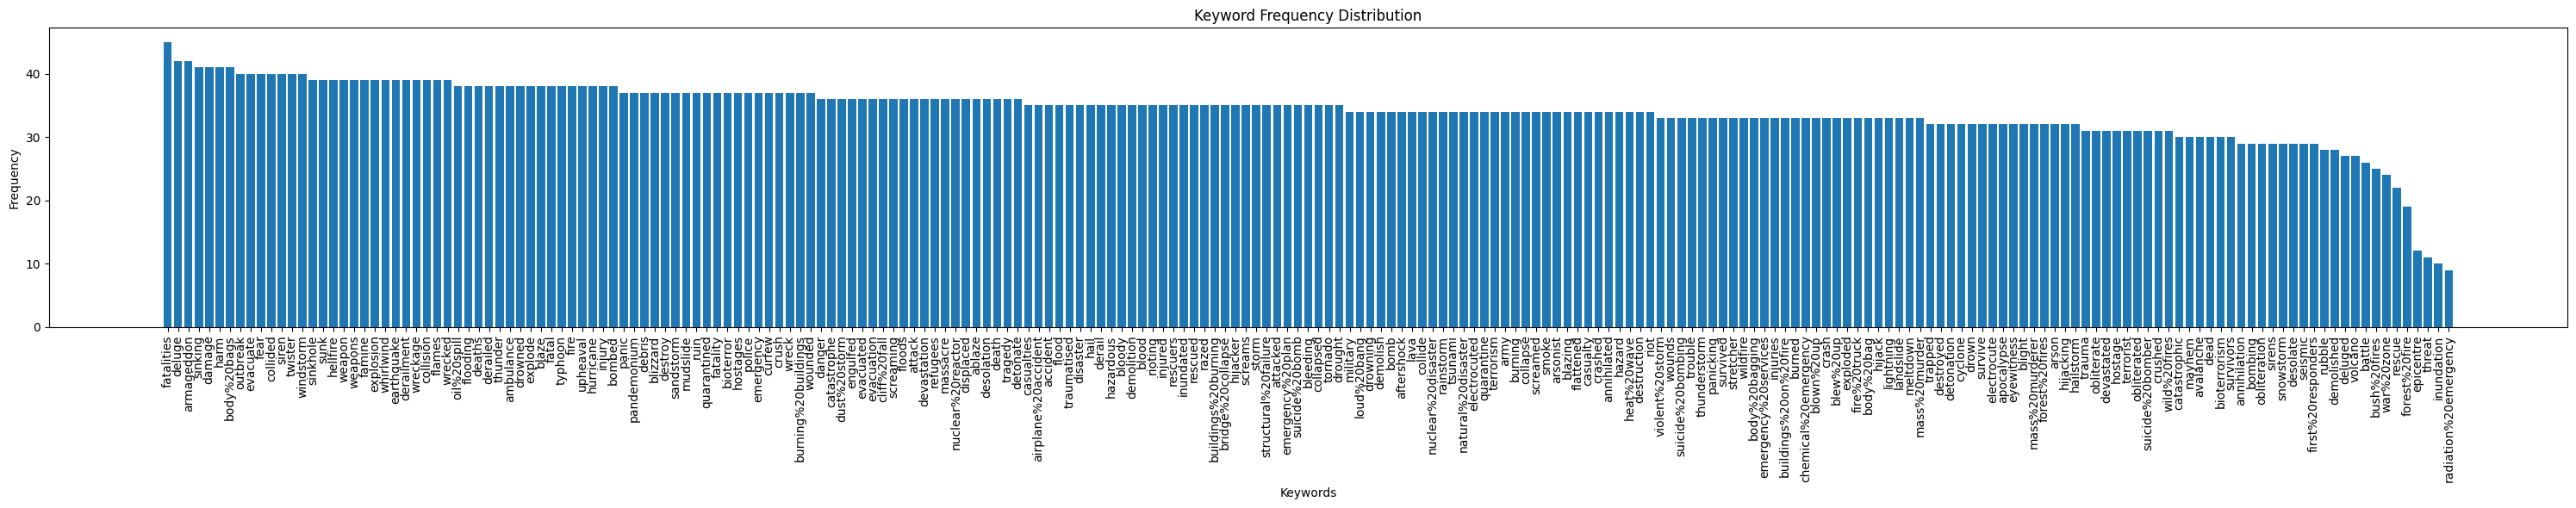

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("preprocessed_data.csv")
keyword_counts = data["keyword"].value_counts()
cantidad = keyword_counts.values
keywords = keyword_counts.index

plt.figure(figsize=(30, 6))  # Adjust the width (10) and height (6) as needed


plt.bar(keywords, cantidad)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.xlabel("Keywords")
plt.ylabel("Frequency")
plt.title("Keyword Frequency Distribution")
plt.tight_layout()
plt.show()


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

# Load the CSV data into a DataFrame
data = pd.read_csv("preprocessed_data.csv")

# Preprocess the target labels to create positive, negative, and neutral categories
data['sentiment'] = data['target'].apply(lambda x: 'positivo' if x == 0 else ('negativo' if x == 1 else 'neutral'))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'], test_size=0.2, random_state=42)

# Create a pipeline with CountVectorizer and MultinomialNB classifier
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100)

# Create a function to classify user input
def classify_tweet(tweet):
    prediction = model.predict([tweet])
    return prediction[0]

# User input
user_input = input("Ingrese un tweet: ")
classification = classify_tweet(user_input)

# Map the prediction to human-readable sentiment categories
sentiment_mapping = {
    'positivo': 'positivo',
    'negativo': 'negativo',
    'neutral': 'neutral'
}
classification_label = sentiment_mapping[classification]
print("Clasificación:", classification_label)


Accuracy: 80.4333552199606
Clasificación: negativo


`` Congratulations to the team behind Marvel Studios’ #MsMarvel on their #TCAAwards win for Outstanding Achievement in Family Programming! `` tweet positivo
`` Hurricane Idalia made landfall in Florida's Big Bend region on Wednesday with sustained winds of 125 mph. `` tweet negatiivo

In [36]:
# Create a function to map sentiment labels to numeric values
sentiment_mapping = {'positivo': 0, 'negativo': 1, 'neutral': 2}
data['sentiment_numeric'] = data['sentiment'].map(sentiment_mapping)

# 7.1. Find the 10 most negative tweets
most_negative_tweets = data.nlargest(10, 'sentiment_numeric')
print("10 Most Negative Tweets:")
print(most_negative_tweets[['text', 'sentiment']])

# 7.2. Find the 10 most positive tweets
most_positive_tweets = data.nsmallest(10, 'sentiment_numeric')
print("\n10 Most Positive Tweets:")
print(most_positive_tweets[['text', 'sentiment']])

# 7.3. Compare the sentiment of tweets in the "disaster" category vs. "non-disaster" category
disaster_tweets = data[data['keyword'] == 'disaster']
non_disaster_tweets = data[data['keyword'] != 'disaster']

# Calculate the average sentiment for each category
average_sentiment_disaster = disaster_tweets['sentiment_numeric'].mean()
average_sentiment_non_disaster = non_disaster_tweets['sentiment_numeric'].mean()

print("\nAverage Sentiment for 'Disaster' Category:", average_sentiment_disaster)
print("Average Sentiment for 'Non-Disaster' Category:", average_sentiment_non_disaster)


10 Most Negative Tweets:
                                                text sentiment
0  our deeds are the reason of this earthquake ma...  negativo
1                 forest fire near ronge sask canada  negativo
2  all residents asked to shelter in place are be...  negativo
3  people receive wildfires evacuation orders in ...  negativo
4  just got sent this photo from ruby alaska as s...  negativo
5  rockyfire update california hwy closed in both...  negativo
6  flood disaster heavy rain causes flash floodin...  negativo
7  im on top of the hill and i can see fire in th...  negativo
8  theres an emergency evacuation happening now i...  negativo
9   im afraid that the tornado is coming to our area  negativo

10 Most Positive Tweets:
                    text sentiment
15          whats up man  positivo
16         i love fruits  positivo
17      summer is lovely  positivo
18     my car is so fast  positivo
19  what goooooooaaaaaal  positivo
20    this is ridiculous  positivo
21        l

### Los 10 tweets más negativos:
- "Our deeds are the reason of this earthquake may allah forgive us all" - Sentiment: negativo
- "Forest fire near ronge sask canada" - Sentiment: negativo
- "All residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected" - Sentiment: negativo
- "People receive wildfires evacuation orders in california" - Sentiment: negativo
- "Just got sent this photo from ruby alaska as smoke from wildfires pours into a school" - Sentiment: negativo
- "Rockyfire update california hwy closed in both directions due to lake county fire cafire wildfires" - Sentiment: negativo
- "Flood disaster heavy rain causes flash flooding of streets in manitou colorado springs areas" - Sentiment: negativo
- "Theres an emergency evacuation happening now in the building across the street" - Sentiment: negativo
- "Im afraid that the tornado is coming to our area" - Sentiment: negativo
- "Three people died from the heat wave so far" - Sentiment: negativo

### Los 10 tweets más positivos:
- "Im on top of the hill and I can see fire in the woods" - Sentiment: positivo
- "Haha south tampa is getting flooded hah wait a second I live in south tampa what am I - gonna do what am I gonna do folksgifs" - Sentiment: positivo
- "Whats up man" - Sentiment: positivo
- "I love fruits" - Sentiment: positivo
- "Summer is lovely" - Sentiment: positivo
- "My car is so fast" - Sentiment: positivo
- "What goooooooaaaaaal" - Sentiment: positivo
- "This is ridiculous" - Sentiment: positivo
- "London is cool" - Sentiment: positivo
- "Love skiing" - Sentiment: positivo


Sentimiento medio para la categoría 'Catástrofe': 0,457 (Más negativo)

Sentimiento medio para la categoría "No catástrofe": 0.383


Parece que los tweets de la categoría "Catástrofe" tienen un sentimiento negativo medio ligeramente superior al de los tweets de la categoría "No catástrofe". Sin embargo, la diferencia es relativamente pequeña, lo que sugiere que ambas categorías contienen algunos tweets con sentimientos negativos.

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# Create a function to map sentiment labels to numeric values
sentiment_mapping = {'positivo': 0, 'negativo': 1, 'neutral': 2}
data['sentiment_numeric'] = data['sentiment'].map(sentiment_mapping)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['text', 'negativity_score']], data['sentiment'], test_size=0.2, random_state=42)

# Custom transformer to extract 'negativity_score' as a NumPy array
def extract_negativity_score(X):
    return X['negativity_score'].values.reshape(-1, 1)

# Create a ColumnTransformer to combine text data and 'negativity_score'
preprocessor = ColumnTransformer(
    transformers=[
        ('text', CountVectorizer(), 'text'),
        ('negativity', FunctionTransformer(extract_negativity_score, validate=False), ['negativity_score'])
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessor and MultinomialNB classifier
model_with_negativity = make_pipeline(preprocessor, MultinomialNB())
model_with_negativity.fit(X_train, y_train)

# Evaluate the model with 'negativity_score' on the test set
y_pred_with_negativity = model_with_negativity.predict(X_test)
accuracy_with_negativity = accuracy_score(y_test, y_pred_with_negativity)
print("Accuracy (with 'negativity_score'):", accuracy_with_negativity * 100)


NameError: name 'ColumnTransformer' is not defined